In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed
import json
import os
import sys
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from random import choice
from time import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
df_f = pd.read_csv("Dataframe_Auxiliar_max4_15.csv")
df_f = df_f.drop("Unnamed: 0", axis=1 )

In [10]:
df_f.head()

,score_home_0,score_away_0,BallPossesion_home_0,BallPossesion_away_0,ShotsOnTarget_home_0,ShotsOnTarget_away_0,ShotsOffTarget_home_0,ShotsOffTarget_away_0,fouls_home_0,fouls_away_0,...,duel_won_home_29,duel_won_away_29,yellow_cards_home_29,yellow_cards_away_29,red_cards_home_29,red_cards_away_29,played_home_29,played_away_29,Resultado,Resultado_Numerico
0,1,2,49.0,51.0,7.0,5.0,10.0,5.0,8.0,15.0,...,52.0,63.0,1.0,0.0,0.0,0.0,1,0,D,1-1
1,2,2,60.0,40.0,7.0,5.0,12.0,2.0,16.0,20.0,...,55.0,59.0,1.0,0.0,0.0,0.0,0,1,L,0-4>
2,1,1,53.0,47.0,5.0,4.0,6.0,7.0,10.0,22.0,...,48.0,44.0,2.0,0.0,0.0,0.0,1,0,L,1-3
3,1,1,74.0,26.0,2.0,3.0,9.0,6.0,8.0,18.0,...,61.0,55.0,5.0,4.0,0.0,0.0,0,1,L,2-3
4,2,3,56.0,44.0,6.0,2.0,9.0,2.0,6.0,14.0,...,44.0,57.0,3.0,4.0,0.0,0.0,0,1,W,3-2


In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Codificación de etiquetas
label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(df_f["Resultado"])
Y = label_encoder.fit_transform(df_f["Resultado_Numerico"])

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
Y = onehot_encoder.fit_transform(Y.reshape(-1, 1))
Y = np.asarray(Y).astype('float32')

X = df_f.drop(["Resultado","Resultado_Numerico"],axis =1)
X = np.asarray(X).astype('float32')
scaler = StandardScaler()
X = scaler.fit_transform(X)
# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)


c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


drop = 0.0
size_layer = 2 ^ 8
batch_size = 2 ^ 6
epoch = 10
model = Sequential([
    Dense(size_layer, activation='relu',
          input_shape=(X.shape[1],), use_bias=True,),
    Dense(size_layer, activation='relu', use_bias=True,),
    Dense(size_layer, activation='relu', use_bias=True,),
    Dense(size_layer, activation='relu', use_bias=True,),
    Dense(size_layer, activation='relu', use_bias=True,),
    # Dense(size_layer, activation='relu', use_bias=True,),
    Dense(Y.shape[1], activation='softmax', use_bias=True,)
])
# # Compilamos el modelo
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1, nesterov=True)
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999)

hinge = tf.keras.losses.CategoricalHinge()
focal_cross = tf.keras.losses.CategoricalFocalCrossentropy(
    alpha=0.2, gamma=3, from_logits=False, label_smoothing=0.0)
cross = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False, label_smoothing=0.0)

model.compile(loss=cross,
              optimizer=adam, metrics=['categorical_accuracy',])

# # Entrenamos el modelo
history = model.fit(X_train, y_train, verbose=1, epochs=epoch, batch_size=batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/10
15054/15054 [==============================] - 13s 840us/step - loss: 2.8888 - categorical_accuracy: 0.1181 - val_loss: 2.8772 - val_categorical_accuracy: 0.1216
Epoch 2/10
15054/15054 [==============================] - 13s 832us/step - loss: 2.8718 - categorical_accuracy: 0.1195 - val_loss: 2.8762 - val_categorical_accuracy: 0.1215
Epoch 3/10
15054/15054 [==============================] - 12s 822us/step - loss: 2.8649 - categorical_accuracy: 0.1199 - val_loss: 2.8793 - val_categorical_accuracy: 0.1194
Epoch 4/10
15054/15054 [==============================] - 12s 814us/step - loss: 2.8582 - categorical_accuracy: 0.1201 - val_loss: 2.8815 - val_categorical_accuracy: 0.1203
Epoch 5/10
15054/15054 [==============================] - 12s 813us/step - loss: 2.8509 - categorical_accuracy: 0.1188 - val_loss: 2.8847 - val_categorical_accuracy: 0.1201
Epoch 6/10
15054/15054 [==============================] - 12s 812us/step - loss: 2.8442 - categorical_accuracy: 0.1197 - val_loss: 2.88

471/471 [==============================] - 0s 537us/step


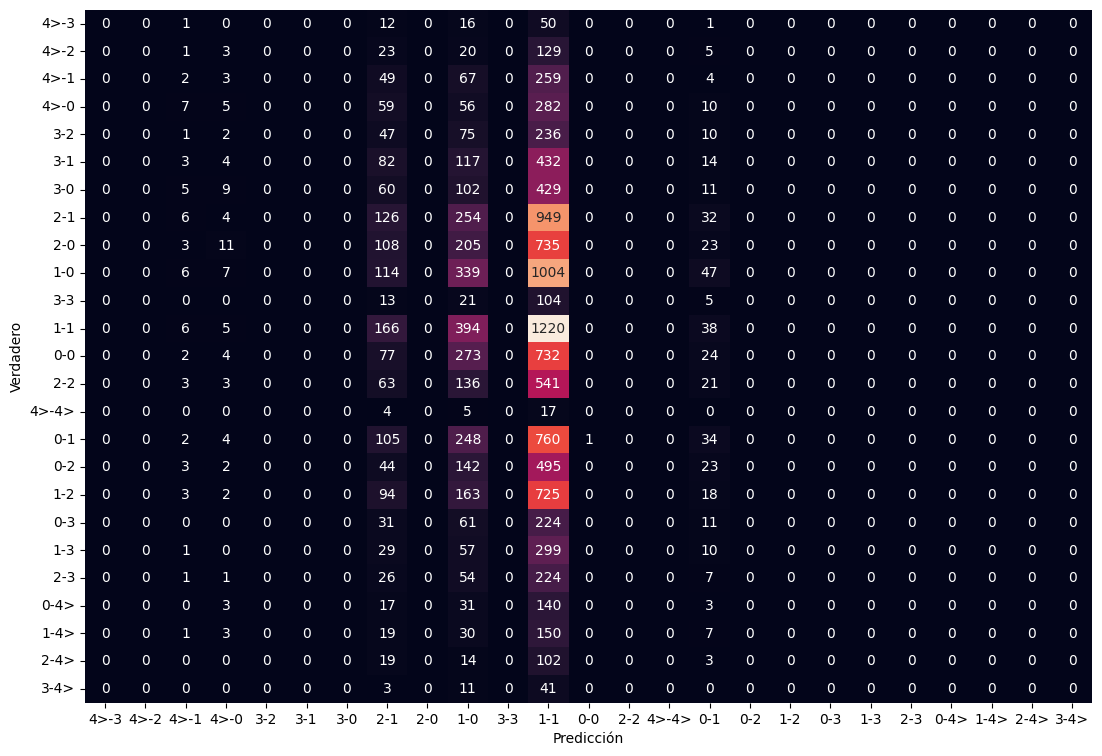

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
from copy import deepcopy

y_prob = model.predict(X_test)
y_test_metrics = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_prob, axis=1)

y_pred_copy = deepcopy(y_pred)
y_test_metrics_copy = deepcopy(y_test_metrics)


###########################################################################################################
# SOLO SI ES RESULTADO NUMERICO
# orden_bonito_max5 = np.array([18, 21, 22, 24, 27, 31, 14, 17, 23, 25, 28, 32, 13, 12, 19,
#                               26, 29, 33, 11, 10, 9, 16, 30, 34, 8, 7, 6, 5, 20, 35, 4, 3, 2, 1, 0, 15])
orden_bonito_max4 = np.array(
    [12, 15, 16, 18, 21, 9, 11, 17, 19, 22, 8, 7, 13, 20, 23, 6, 5, 4,10, 24, 3, 2, 1, 0, 14])
orden_bonito = orden_bonito_max4

label = [0 for i in range(len(orden_bonito))]
for i in range(len(label_encoder.classes_)):
    label[orden_bonito[i]] = label_encoder.classes_[i]
    y_pred[y_pred_copy == i] = orden_bonito[i]
    y_test_metrics[y_test_metrics_copy == i] = orden_bonito[i]

label = np.array(label)
###########################################################################################################
# RESULTADO GENERAL
# label =label_encoder.classes_
###########################################################################################################
# Matriz de confusión
conf_matrix = confusion_matrix(y_test_metrics, y_pred)
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=label, yticklabels=label)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()
# print(history.history.keys())
# #  "Accuracy"
# plt.plot(history.history['categorical_accuracy'])
# plt.plot(history.history['val_categorical_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
# # "Loss"
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')

## Lo siguiente va solo si se hizo el resultado numérico

In [14]:
y_test_metrics_simplificado = []
y_pred_simplificado = []
for i in range(len(y_test_metrics)):
    if y_test_metrics[i] <= 9:
        y_test_metrics_simplificado.append(0)
    elif y_test_metrics[i] <= 14:
        y_test_metrics_simplificado.append(1)
    else:
        y_test_metrics_simplificado.append(2)
        
for i in range(len(y_pred)):
    if y_pred[i] <= 9:
        y_pred_simplificado.append(0)
    elif y_pred[i] <= 14:
        y_pred_simplificado.append(1)
    else:
        y_pred_simplificado.append(2)

        

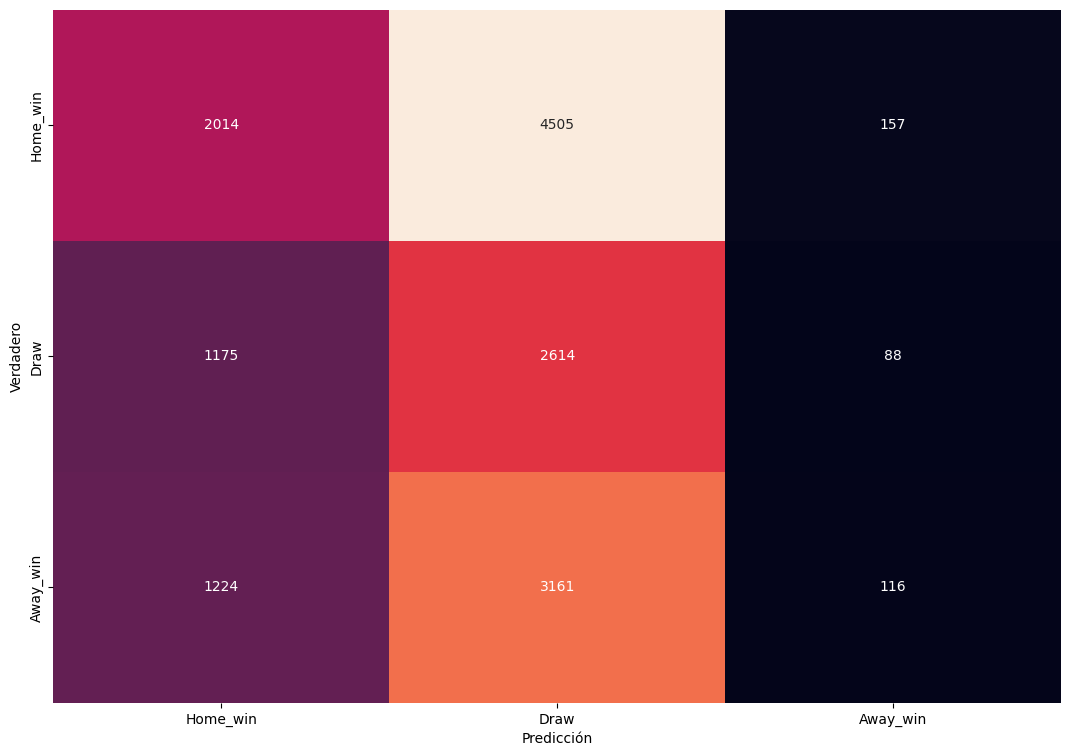

In [15]:
conf_matrix = confusion_matrix(y_test_metrics_simplificado, y_pred_simplificado)
label = ["Home_win","Draw","Away_win"]
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=label, yticklabels=label)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

In [16]:
print(classification_report(y_test_metrics_simplificado, y_pred_simplificado))

              precision    recall  f1-score   support

           0       0.46      0.30      0.36      6676
           1       0.25      0.67      0.37      3877
           2       0.32      0.03      0.05      4501

    accuracy                           0.32     15054
   macro avg       0.34      0.33      0.26     15054
weighted avg       0.36      0.32      0.27     15054



In [17]:
y_prob_suma = []
for i in range(len(y_prob)):
    aux = [0, 0, 0]
    for j in range(len(orden_bonito)):
        if orden_bonito[j] <=9:
            aux[0] += y_prob[i][j]
        elif orden_bonito[j] <=14:
            aux[1] += y_prob[i][j]
        else:
            aux[2] += y_prob[i][j]
    y_prob_suma.append(aux)
y_prob_suma = np.array(y_prob_suma)
y_pred_suma = np.argmax(y_prob_suma, axis=1)

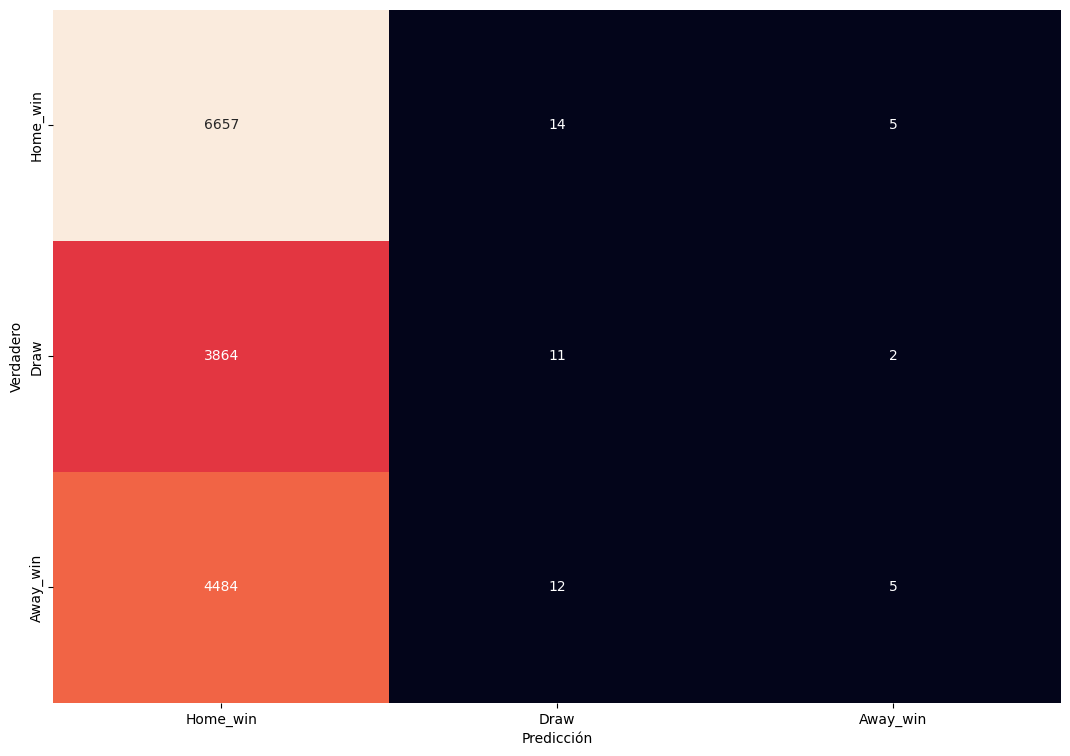

In [18]:
conf_matrix = confusion_matrix(y_test_metrics_simplificado, y_pred_suma)
label = ["Home_win","Draw","Away_win"]
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=label, yticklabels=label)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

In [19]:
print(classification_report(y_test_metrics_simplificado, y_pred_suma))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61      6676
           1       0.30      0.00      0.01      3877
           2       0.42      0.00      0.00      4501

    accuracy                           0.44     15054
   macro avg       0.39      0.33      0.21     15054
weighted avg       0.40      0.44      0.27     15054

